#**Analysis of Foreign and Domestic Tourists in Maharashtra**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Required Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

##### Libraries Used.


1.   Numpy : For all array/matrix and Linear Algebra routines.
2.   Pandas : For reading the Datset from .xlsx format, basic EDA and visualizations.
3.   Matplotlib : For all the plots generated in the Notebook.
4.   Sqlite3 : To create a DataBase which stores the Dataset and enables us to make SQL like queries and fetch results from it.



### Loading the Dataset

In [ ]:
# We use pandas to read the dataset stored as .xlsx format

filename = "final_Maharashtra-Dataset.xlsx"
tour_2011_df = pd.read_excel(filename, sheet_name = 0)
tour_2012_df = pd.read_excel(filename, sheet_name = 1)
tour_2013_df = pd.read_excel(filename, sheet_name = 2)
tour_2014_df = pd.read_excel(filename, sheet_name = 3)

In [ ]:
# No. of tourists visiting Maharashtra in 2011

tour_2011_df.head()

,Destination,District,Month,Domestic Visits,Foreign Visits,Total Visits,Age: 15-24 yrs,Age: 25-34 yrs,Age: 35-44 yrs,Age: 45-60 yrs,Age: > 60 yrs,Male:Female,Purpose: Leisure,Purpose: Non-Leisure
0,Shirdi,AHMEDNAGAR,January,1274940.0,1276.0,1276216.0,255243.2,574297.20,268005.36,165908.08,12762.16,4.263158,1033734.96,242481.04
1,Shanisignapur,AHMEDNAGAR,January,795211.0,796.0,796007.0,159201.4,358203.15,167161.47,103480.91,7960.07,4.263158,644765.67,151241.33
2,Siddhivinayak - Siddhatek,AHMEDNAGAR,January,24950.0,0.0,24950.0,4990.0,11227.50,5239.50,3243.50,249.50,4.263158,20209.50,4740.50
3,Ahmednagar fort,AHMEDNAGAR,January,254.0,0.0,254.0,50.8,114.30,53.34,33.02,2.54,4.263158,205.74,48.26
4,Newas,AHMEDNAGAR,January,186629.0,0.0,186629.0,37325.8,83983.05,39192.09,24261.77,1866.29,4.263158,151169.49,35459.51


In [ ]:
# Adding the year information as an additional column

tour_2011_df['Year'] = [2011] * len(tour_2011_df)
tour_2012_df['Year'] = [2012] * len(tour_2012_df)
tour_2013_df['Year'] = [2013] * len(tour_2013_df)
tour_2014_df['Year'] = [2014] * len(tour_2014_df)

In [ ]:
# Combining the DataFrames into one single DataFrame

Mhrshtra_tourist_df = pd.concat([
    tour_2011_df, tour_2012_df, 
    tour_2013_df, tour_2014_df
    ])

In [ ]:
# Printing the combined DataFrame

Mhrshtra_tourist_df.tail()

,Destination,District,Month,Domestic Visits,Foreign Visits,Total Visits,Age: 15-24 yrs,Age: 25-34 yrs,Age: 35-44 yrs,Age: 45-60 yrs,Age: > 60 yrs,Male:Female,Purpose: Leisure,Purpose: Non-Leisure,Year
1183,Vasai Fort,THANE,December,26001.934384,22.535016,26024.469400,7807.340820,9108.564290,5204.893880,3643.425716,260.244694,2.333333,20819.575520,5204.893880,2014
1184,Ambarnath,THANE,December,52085.957848,8.212006,52094.169854,15628.250956,18232.959449,10418.833971,7293.183780,520.941699,2.333333,41675.335883,10418.833971,2014
1185,SEVAGRAM,WARDHA,December,13309.121872,150.029744,13459.151616,2557.238807,5922.026711,2961.013356,1615.098194,403.774548,4.000000,4037.745485,9421.406131,2014
1186,Shirpur ( Parshwanath Digamber Jain Mandir),WASHIM,December,1618.788908,10.263112,1629.052020,309.519884,716.782889,358.391444,195.486242,48.871561,4.000000,488.715606,1140.336414,2014
1187,Kalamb Tipeshwar\nSanctury,YAVATMAL,December,26964.732448,6.100400,26970.832848,5124.458241,11867.166453,5933.583227,3236.499942,809.124985,4.000000,9439.791497,17531.041351,2014


In [ ]:
# Printing Basic Info. about the dataset

Mhrshtra_tourist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 1187
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Destination           4752 non-null   object 
 1   District              4752 non-null   object 
 2   Month                 4752 non-null   object 
 3   Domestic Visits       4737 non-null   float64
 4   Foreign Visits        4737 non-null   float64
 5   Total Visits          4737 non-null   float64
 6   Age: 15-24 yrs        4752 non-null   float64
 7   Age: 25-34 yrs        4752 non-null   float64
 8   Age: 35-44 yrs        4752 non-null   float64
 9   Age: 45-60 yrs        4752 non-null   float64
 10  Age:  > 60 yrs        4752 non-null   float64
 11  Male:Female           4752 non-null   float64
 12  Purpose: Leisure      4752 non-null   float64
 13  Purpose: Non-Leisure  4752 non-null   float64
 14  Year                  4752 non-null   int64  
dtypes: float64(11), int64

## EDA

In [ ]:
# Checking for Null/NaN/Missing values

Mhrshtra_tourist_df.isnull().sum()

Destination              0
District                 0
Month                    0
Domestic Visits         15
Foreign Visits          15
Total Visits            15
Age: 15-24 yrs           0
Age: 25-34 yrs           0
Age: 35-44 yrs           0
Age: 45-60 yrs           0
Age:  > 60 yrs           0
Male:Female              0
Purpose: Leisure         0
Purpose: Non-Leisure     0
Year                     0
dtype: int64

In [ ]:
# Replacing Null/NaN/Missing Values with the Avg. value
# The missing values in a specific column are replaced by the mean values of that column

Mhrshtra_tourist_df['Domestic Visits'].fillna(
    Mhrshtra_tourist_df['Domestic Visits'].mean(), inplace=True
)

Mhrshtra_tourist_df['Foreign Visits'].fillna(
    Mhrshtra_tourist_df['Foreign Visits'].mean(), inplace=True
)

Mhrshtra_tourist_df['Total Visits'].fillna(
    Mhrshtra_tourist_df['Total Visits'].mean(), inplace=True
)

In [ ]:
# Converting Required Columns to integers

Mhrshtra_tourist_df = Mhrshtra_tourist_df.astype(
    {
     'Domestic Visits' : 'int',
     'Foreign Visits' : 'int',
     'Total Visits' : 'int',
     'Age: 15-24 yrs   ' : 'int',
     'Age: 25-34 yrs' : 'int',
     'Age: 35-44 yrs' : 'int',
     'Age: 45-60 yrs' : 'int',
     'Age:  > 60 yrs' : 'int',
     'Purpose: Leisure' : 'int',
     'Purpose: Non-Leisure' : 'int'
    }
)

### Connecting to Sqlite3 Database

In [ ]:
# Creating the DataBase

conn = sqlite3.connect('Mhrshtra_tourist_db')
c = conn.cursor()

# Writing Pandas DataFrame to Sqlite3 DB

Mhrshtra_tourist_df.columns = Mhrshtra_tourist_df.columns.to_flat_index()
Mhrshtra_tourist_df.to_sql('tourists', conn, if_exists='replace', index=False)

conn.commit()

In [ ]:
# Running a sample Query to check the connection

query = """
    SELECT Destination, Month, "Domestic Visits" \
    FROM tourists \
    WHERE District="AHMEDNAGAR" AND "Total Visits" < 20000 AND Year=2014
    GROUP BY Month
"""
c.execute(query)
for row in c.fetchall():
    print(row)

('Ahmednagar fort', 'December', 291)
('Ahmednagar fort', 'February', 277)
('Ahmednagar fort', 'January', 276)
('Ahmednagar fort', 'March', 269)
('Ahmednagar fort', 'November', 286)
('Ahmednagar fort', 'October', 285)


## Data Visualizations

#### After converting the entire dataset from a Pandas Dataframe to a proper SQLite3 database, we can obtain any required results by querying the database. A common pattern can be observed for all the data visualizations below, where the appropriate query is created, executed, and the result is captured before generating the necessary plots to visualize it. Below are a few common queries and their corresponding visualizations.

### 1. Year-Wise Distribution of Domestic and Foreign Tourist

In [ ]:
query = """
    SELECT sum("Domestic Visits"), sum("Foreign Visits"), sum("Total Visits"), Year \
    FROM tourists \
    GROUP BY Year
"""
c.execute(query)
out = c.fetchall()
for row in out:
    print(row)

(66638051, 3033476, 69671525, 2011)
(67698473, 3040688, 70739348, 2012)
(68739724, 3098184, 71838165, 2013)
(69796782, 3159464, 72956564, 2014)


In [ ]:
labels = ['Domestic Visits', 'Foreign Visits']
Sizes_2011 = out[0][:2]
Sizes_2012 = out[0][:2]
Sizes_2013 = out[0][:2]
Sizes_2014 = out[0][:2]

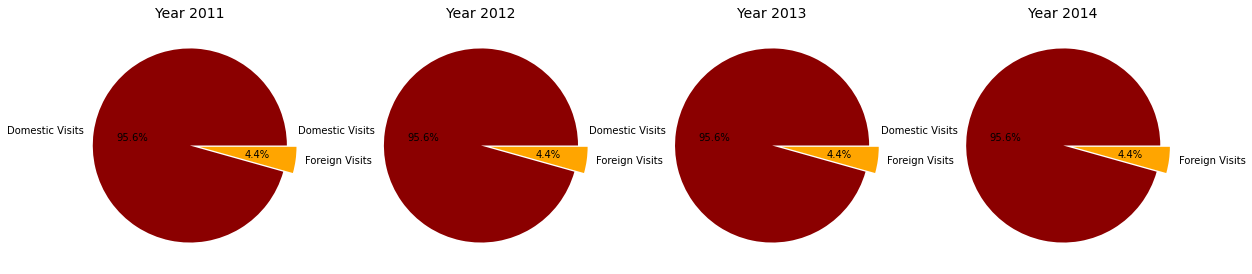

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,20))
colors = ['#8B0000', '#FFA500']
ax[0].pie(Sizes_2011, explode=(0, 0.1), labels=labels, autopct='%1.1f%%', colors=colors)
ax[0].set_title("Year 2011", fontsize=14)

ax[1].pie(Sizes_2012, explode=(0, 0.1), labels=labels, autopct='%1.1f%%', colors=colors)
ax[1].set_title("Year 2012", fontsize=14)

ax[2].pie(Sizes_2013, explode=(0, 0.1), labels=labels, autopct='%1.1f%%', colors=colors)
ax[2].set_title("Year 2013", fontsize=14)

ax[3].pie(Sizes_2014, explode=(0, 0.1), labels=labels, autopct='%1.1f%%', colors=colors)
ax[3].set_title("Year 2014", fontsize=14)
plt.show()

##### To create a visualization, the necessary data is typically obtained using an SQL query. The initial visualization we have constructed displays the year-wise percentage of domestic and foreign visitors in Maharashtra based on the available data.

### 2. Month-Wise Distribution of Domestic and Foreign Tourist For the Year 2011

In [ ]:
query = """
    SELECT sum("Domestic Visits"), sum("Foreign Visits") \
    FROM tourists \
    WHERE Year=2011
    GROUP BY Month
"""
c.execute(query)
out = c.fetchall()
for row in out:
    print(row)

(11467368, 530501)
(11995244, 488683)
(12274067, 509009)
(12050822, 495726)
(9608565, 527590)
(9241985, 481967)


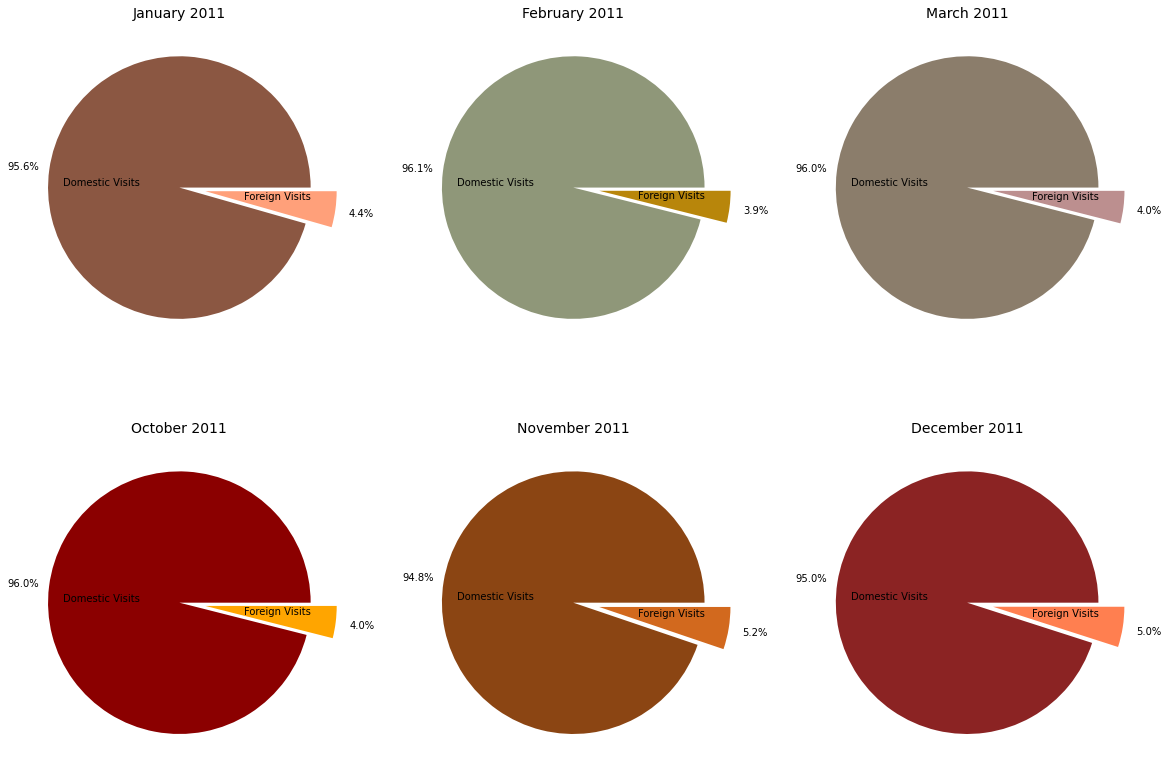

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
colors = [
    ['#8B5742', '#FFA07A'],   
    ['#8F9779', '#B8860B'],   
    ['#8B7D6B', '#BC8F8F'],   
    ['#8B0000', '#FFA500'],   
    ['#8B4513', '#D2691E'],   
    ['#8B2323', '#FF7F50']    
]
labels = ['Domestic Visits', 'Foreign Visits']
titles = ['January', 'February', 'March', 'October', 'November', 'December']

fig, ax = plt.subplots(2,3, figsize=(20,14))
ctr = 0
for i in range(2):
    for j in range(3):
        ax[i][j].pie(out[ctr], explode=(0, 0.2), labels=labels, 
                     autopct='%1.1f%%', pctdistance=1.2, labeldistance=.3,
                     colors=colors[ctr])
        ax[i][j].set_title(titles[ctr]+' 2011', fontsize=14)
        ctr +=1
print()

##### The data presented above displays the monthly distribution of domestic and foreign tourist arrivals in Maharashtra, based on the available data. By examining the pie charts above, it can be observed that the highest number of foreign tourists arrived during the months of November and December in the year 2011.

### 3. Top 5 Places with Most Domestic Tourist Arrivals

In [ ]:
query = """
    SELECT Destination, "Domestic Visits"
    FROM tourists
    WHERE Year = 2011
    GROUP BY Destination
    ORDER BY "Domestic Visits" DESC
    LIMIT 5
"""
c.execute(query)
out = c.fetchall()
for row in out:
    print(row)

('Shirdi', 1274940)
('Shanisignapur', 795211)
('Gateway of India', 729758)
('Sidhivinayak', 681214)
('Haji Ali', 556336)


In [ ]:
y2k11_top_5_labels = [entry[0] for entry in out]
y2k11_top_5_values = [entry[1] for entry in out]

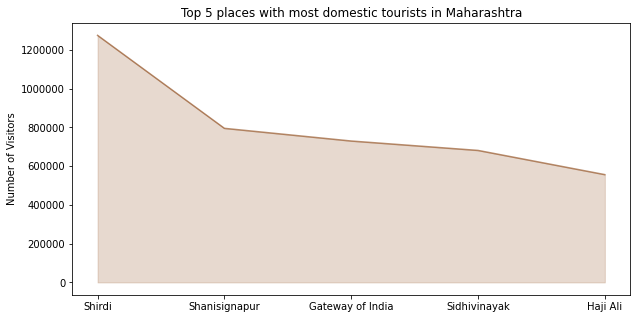

In [ ]:
plt.figure(figsize=(10, 5))
plt.fill_between(range(5), y2k11_top_5_values, color='#8B4513', alpha=0.2)
plt.plot(range(5), y2k11_top_5_values, color='#8B4513', alpha=0.6)
plt.xticks(range(5), y2k11_top_5_labels)
plt.title("Top 5 places with most domestic tourists in Maharashtra")
plt.ylabel("Number of Visitors")
plt.ticklabel_format(axis='y', style='plain')
plt.show()


##### While the plot may be labeled as the Top 5 most visited places in Maharashtra for the year 2011, the same trend can be observed across different years. Even if the year is changed to 2012, 2013, or 2014, the relative positions of the top five most visited places may shift based on the number of tourist arrivals, but the overall trend will likely remain the same.

### 4. Top 5 Places with Most Foreign Tourist Arrivals

In [ ]:
query = """
    SELECT Destination, "Foreign Visits"
    FROM tourists
    WHERE Year = 2011
    GROUP BY Destination
    ORDER BY "Foreign Visits" DESC
    LIMIT 5
"""
c.execute(query)
out = c.fetchall()
for row in out:
    print(row)

('Sidhivinayak', 130722)
('Haji Ali', 105969)
('Gateway of India', 99513)
('Elephanta caves', 45595)
('Mahalaxmi temple', 34775)


In [ ]:
y2k11_top_5_labels = [entry[0] for entry in out]
y2k11_top_5_values = [entry[1] for entry in out]

In [ ]:
import plotly.express as px
import pandas as pd

# Define the data
y2k11_top_5_labels = ['Mumbai', 'Pune', 'Nashik', 'Aurangabad', 'Nagpur']
y2k11_top_5_values = [5748019, 2553985, 1458837, 955301, 747327]
data = pd.DataFrame({'labels': y2k11_top_5_labels, 'values': y2k11_top_5_values})

# Create the treemap
fig = px.treemap(data, path=['labels'], values='values',
                 color='values', color_continuous_scale='Oranges',
                 hover_name='labels', hover_data=['values'])

# Add a title and subtitle
fig.update_layout(
    title={'text': "Top 5 Places with the Most Foreign Tourists in Maharashtra",
           'y': 0.95,
           'x': 0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    font=dict(size=16),
    margin=dict(l=10, r=10, t=80, b=10),
    annotations=[dict(
        x=0.5,
        y=0.95,
        xref='paper',
        yref='paper',
        showarrow=False,
        font=dict(size=12),
    )]
)

fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



##### It can be observed from the difference in the bar plots that the top five places most visited by foreign tourists are distinct from the top five most visited places by Indian tourists.

### 5. Top 10 Districts in Maharashtra visited for Leisure/Non-Leisure

In [ ]:
query = """
    SELECT District, sum("Purpose: Leisure")
    FROM tourists
    GROUP BY District
    ORDER BY sum("Purpose: Leisure") DESC
    LIMIT 10
"""
c.execute(query)
out1 = c.fetchall()

In [ ]:
query = """
    SELECT District, sum("Purpose: Non-Leisure")
    FROM tourists
    GROUP BY District
    ORDER BY sum("Purpose: Leisure") DESC
    LIMIT 10
"""
c.execute(query)
out2 = c.fetchall()

In [ ]:
top_10_leisure_labels = [entry[0] for entry in out1]
top_10_leisure_values = [entry[1] for entry in out1]

In [ ]:
top_10_non_leisure_labels = [entry[0] for entry in out2]
top_10_non_leisure_values = [entry[1] for entry in out2]

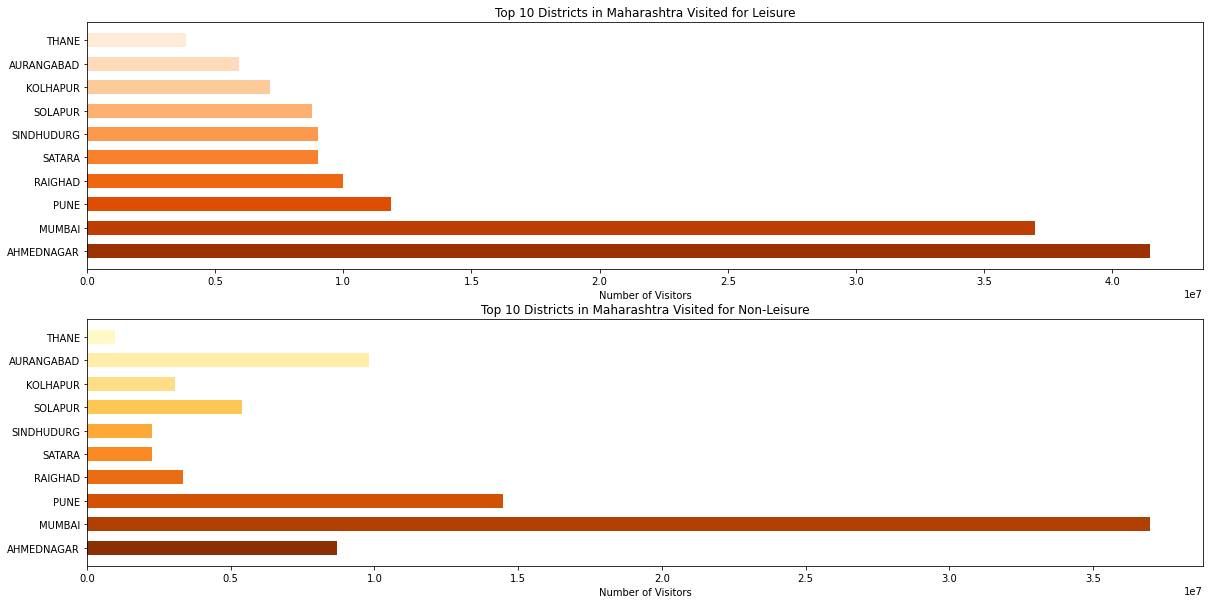

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframes for leisure and non-leisure data
df_leisure = pd.DataFrame({'District': top_10_leisure_labels, 'Number of Visitors': top_10_leisure_values})
df_non_leisure = pd.DataFrame({'District': top_10_non_leisure_labels, 'Number of Visitors': top_10_non_leisure_values})

fig, ax = plt.subplots(2,1, figsize=(20,10))

# horizontal bar plot for top 10 leisure districts
orange_palette = sns.color_palette("Oranges_r", len(top_10_leisure_labels))
ax[0].barh(range(10), top_10_leisure_values, tick_label=top_10_leisure_labels, height=0.6, color=orange_palette)
ax[0].set_title("Top 10 Districts in Maharashtra Visited for Leisure")
ax[0].set_xlabel("Number of Visitors")

# horizontal bar plot for top 10 non-leisure districts
brown_palette = sns.color_palette("YlOrBr_r", len(top_10_non_leisure_labels))
ax[1].barh(range(10), top_10_non_leisure_values, tick_label=top_10_non_leisure_labels, height=0.6, color=brown_palette)
ax[1].set_title("Top 10 Districts in Maharashtra Visited for Non-Leisure")
ax[1].set_xlabel("Number of Visitors")

plt.show()


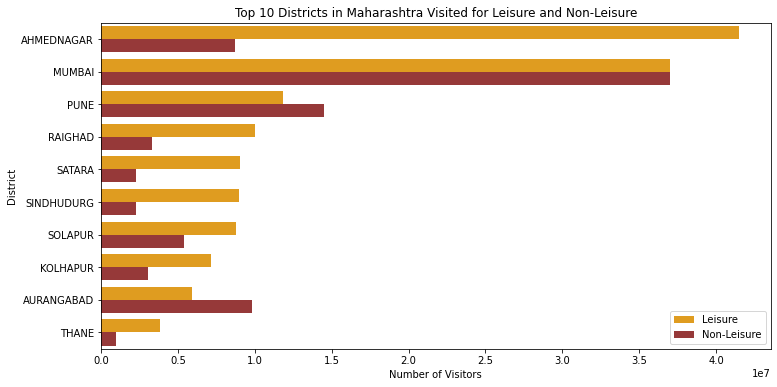

In [ ]:
# Define custom color palette
custom_palette = {'Leisure': 'orange', 'Non-Leisure': 'brown'}

# Create a new dataframe combining leisure and non-leisure data
df_combined = pd.concat([df_leisure, df_non_leisure], keys=['Leisure', 'Non-Leisure'])

# Create a horizontal bar plot for combined data
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Visitors', y='District', data=df_combined, hue=df_combined.index.get_level_values(0), palette=custom_palette)
plt.title('Top 10 Districts in Maharashtra Visited for Leisure and Non-Leisure')
plt.xlabel('Number of Visitors')
plt.legend()
plt.show()


##### The two bar plots presented above display the top 10 districts that visitors travel to for leisure or non-leisure purposes. Leisure travel primarily encompasses tourism, visiting friends and family, and all non-business or educational reasons.

### 6. Top 10 Places visited by Tourists of Different Age-Groups

In [ ]:
query = """
    SELECT Destination, sum("Age: 25-34 yrs")
    FROM tourists
    GROUP BY Destination
    ORDER BY sum("Age: 25-34 yrs") DESC
    LIMIT 10
"""
c.execute(query)
out3 = c.fetchall()

In [ ]:
top_10_age_25_34_labels = [entry[0] for entry in out3]
top_10_age_25_34_values = [entry[1] for entry in out3]

In [ ]:
query = """
    SELECT Destination, sum("Age: 45-60 yrs")
    FROM tourists
    GROUP BY Destination
    ORDER BY sum("Age: 45-60 yrs") DESC
    LIMIT 10
"""
c.execute(query)
out4 = c.fetchall()

In [ ]:
top_10_age_45_60_labels = [entry[0] for entry in out4]
top_10_age_45_60_values = [entry[1] for entry in out4]

In [ ]:
query = """
    SELECT Destination, sum("Age:  > 60 yrs")
    FROM tourists
    GROUP BY Destination
    ORDER BY sum("Age:  > 60 yrs") DESC
    LIMIT 10
"""
c.execute(query)
out5 = c.fetchall()

In [ ]:
top_10_age_60_labels = [entry[0] for entry in out5]
top_10_age_60_values = [entry[1] for entry in out5]

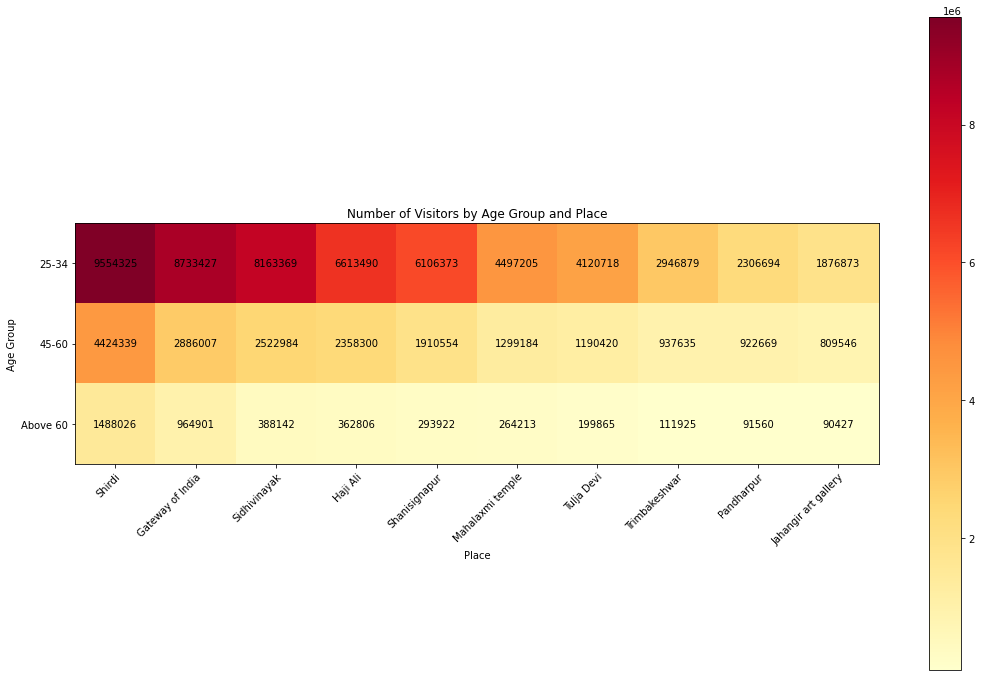

In [ ]:
# Create a 2D array with the number of visitors for each place and age group
data = np.array([
    top_10_age_25_34_values,
    top_10_age_45_60_values,
    top_10_age_60_values
])

# Set the x and y axis labels
places = top_10_age_25_34_labels
age_groups = ['25-34', '45-60', 'Above 60']

# Create the heatmap
fig, ax = plt.subplots(figsize=(18, 12))
im = ax.imshow(data, cmap='YlOrRd')

# Add the colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the x and y axis ticks and labels
ax.set_xticks(np.arange(len(places)))
ax.set_yticks(np.arange(len(age_groups)))
ax.set_xticklabels(places)
ax.set_yticklabels(age_groups)

# Rotate the x axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(age_groups)):
    for j in range(len(places)):
        text = ax.text(j, i, data[i, j], ha="center", va="center", color="black")

# Set the title and axis labels
ax.set_title("Number of Visitors by Age Group and Place")
ax.set_xlabel("Place")
ax.set_ylabel("Age Group")

plt.show()


##### The three plots depicted above illustrate the distribution of the top 10 most visited places in Maharashtra among tourists of varying age groups. These plots offer a fascinating glimpse into the correlation between age and preferred tourist destinations. According to the bar plots, it can be observed that Shanisignapur, which is a temple, is more frequently visited by individuals over 35 years of age than those who fall below this age bracket.

### 7. Top 5 Places in Maharashtra with the Highest/Lowest tourist Male-to-Female ratio

In [ ]:
query = """
    SELECT Destination, "Male:Female"
    FROM tourists
    GROUP BY "Male:Female"
    ORDER BY "Male:Female" DESC
    LIMIT 5
"""
c.execute(query)
out1 = c.fetchall()

In [ ]:
query = """
    SELECT Destination, "Male:Female"
    FROM tourists
    GROUP BY "Male:Female"
    ORDER BY "Male:Female"
    LIMIT 5
"""
c.execute(query)
out2 = c.fetchall()

In [ ]:
top_10_highest_male_female_labels = [entry[0] for entry in out1]
top_10_highest_male_female_values = [entry[1] for entry in out1]

In [ ]:
top_10_lowest_male_female_labels = [entry[0] for entry in out2]
top_10_lowest_male_female_values = [entry[1] for entry in out2]

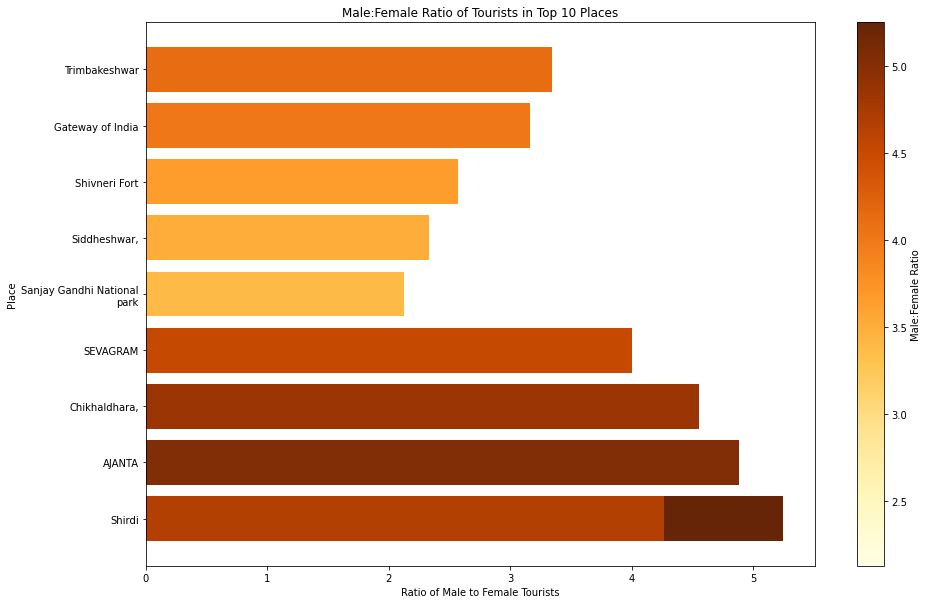

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a combined list of labels and values for both top 10 highest and lowest ratios
labels = top_10_highest_male_female_labels + top_10_lowest_male_female_labels
values = top_10_highest_male_female_values + top_10_lowest_male_female_values

# Calculate the male-female ratio for each place and create a corresponding color map
ratios = np.array(top_10_highest_male_female_values + top_10_lowest_male_female_values)
colors = plt.cm.YlOrBr(ratios / ratios.max())

# Create a horizontal bar chart with two sets of bars for each place
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(y=labels, width=values, color=colors)

# Add a legend to show the male-female ratio scale
cmap = plt.cm.YlOrBr
norm = plt.Normalize(ratios.min(), ratios.max())
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Male:Female Ratio')

# Add a title and axis labels
ax.set_title('Male:Female Ratio of Tourists in Top 10 Places')
ax.set_xlabel('Ratio of Male to Female Tourists')
ax.set_ylabel('Place')

plt.show()


##### We can infer from the plot above that places such as Shirdi, which is a temple, and Ajanta or Chikaldhara, which are tourist spots, have the highest male-to-female ratios of tourists.

### 8. Top 10 Districts in Maharashtra Having Highest Number of Average Visitors

In [ ]:
query = """
    SELECT District, AVG("Total Visits")
    FROM tourists
    GROUP BY District
    ORDER BY "Total Visits" DESC
    LIMIT 10
"""
c.execute(query)
res = c.fetchall()

In [ ]:
top_10_highest_avg_visit_labels = [entry[0] for entry in res]
top_10_highest_avg_visit_values = [entry[1] for entry in res]

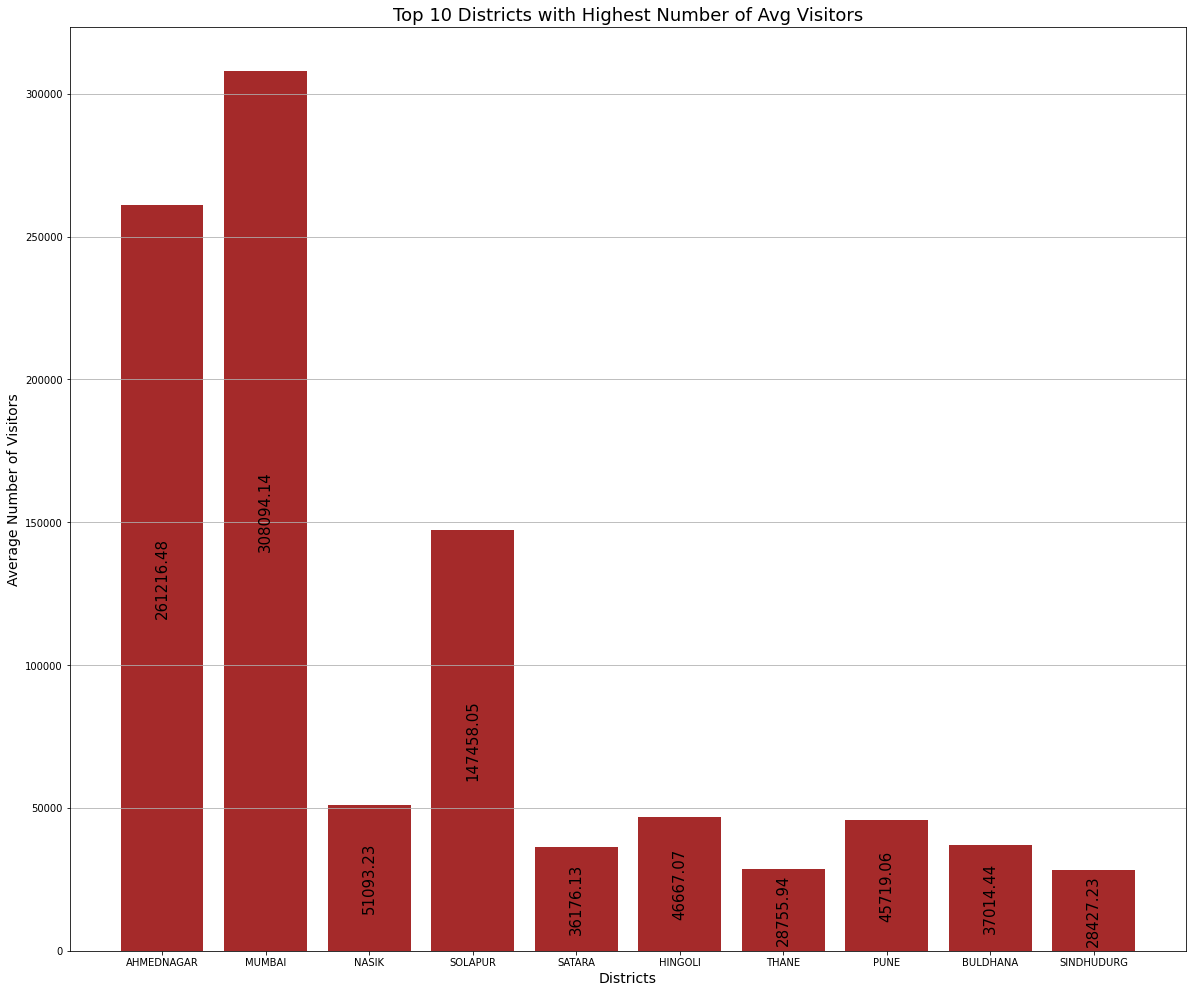

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20,17))

# Plot the bar chart
plt.bar(range(10), top_10_highest_avg_visit_values, width=0.8, color="brown")

# Add x-axis and y-axis labels
plt.xlabel("Districts", fontsize=14)
plt.ylabel("Average Number of Visitors", fontsize=14)

# Add title
plt.title("Top 10 Districts with Highest Number of Avg Visitors", fontsize=18)

# Add tick labels
plt.xticks(range(10), top_10_highest_avg_visit_labels)

# Add horizontal gridlines
plt.grid(axis="y")

# Add annotations
for i, v in enumerate(top_10_highest_avg_visit_values):
    plt.text(i, v/2, "{:.2f}".format(v), rotation=90, ha="center", va="center", color="black", fontsize=15)

# Show the plot
plt.show()


##### The above plot shows the distribution among the cities having the highest number of Average visitors and the Average is calculated over 4 years.

### 9. Monthly Distribution of Total No. of Visitors in Shirdi v.s. Gateway of India in the Year 2014

In [ ]:
query = """
    SELECT Month, "Total Visits"
    FROM tourists
    WHERE Destination = "Shirdi" AND YEAR = 2014
    GROUP BY Month
    LIMIT 10
"""
c.execute(query)
res2 = c.fetchall()

In [ ]:
Shirdi_2014 = [entry[1] for entry in res2]

In [ ]:
query = """
    SELECT Month, "Total Visits"
    FROM tourists
    WHERE Destination = "Gateway of India" AND YEAR = 2014
    GROUP BY Month
    LIMIT 10
"""
c.execute(query)
res3 = c.fetchall()

In [ ]:
GOI_2014 = [entry[1] for entry in res3]

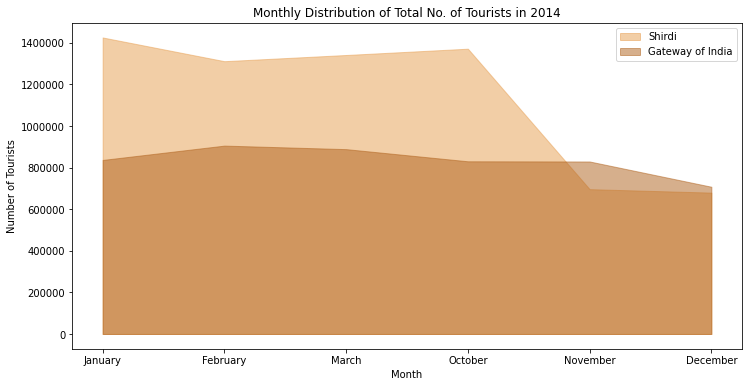

In [ ]:
# Data
Shirdi_2014 = [entry[1] for entry in res2]
GOI_2014 = [entry[1] for entry in res3]
months = ['January', 'February', 'March', 'October', 'November', 'December']

# Define custom color scheme
colors = ['#E79E4F', '#AF601A', '#FFD662']

# Figure and Axes
fig, ax = plt.subplots(figsize=(12, 6))

# Area Plots
ax.fill_between(months, Shirdi_2014, alpha=0.5, color=colors[0], label='Shirdi')
ax.fill_between(months, GOI_2014, alpha=0.5, color=colors[1], label='Gateway of India')

# Axis Labels and Title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Tourists')
ax.set_title('Monthly Distribution of Total No. of Tourists in 2014')

# Legend
ax.legend()

# Remove Scientific Notation on y-axis
plt.ticklabel_format(axis='y', style='plain')

# Show Plot
plt.show()


##### By examining the two adjacent pie charts shown above, it can be noted that the months of January, March, and October had higher visitations to Shirdi, which is a popular temple, compared to the other months. On the other hand, the number of tourists visiting the Gateway of India, which is a renowned tourist destination, was nearly evenly distributed throughout all months in the year 2014.

## Building a Recommendation System

#### A neural-network based recommendation system has been developed to provide recommendations for tourists looking to visit different destinations within Maharashtra, India. This system takes the district and destination as input and generates recommendations for other destinations within the same district or a different district that may be of interest to the tourist.


In [ ]:
#importing necessary libraries

import time
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Now we will get the features ready and build the recommendation system

##### Libraries Used:


1.   time : Used for calculating the time taken by the model to train.
2.   sklearn : Used for importing routines like StandardScaler used for Standardizing the data.
3.   tensorflow.keras : Used to import classes such as Sequential and Dense used for creating and training the mode.



In [ ]:
# Extract the unique destinations

destinations = Mhrshtra_tourist_df["Destination"].unique()

features = []
for dest in destinations:
    dest_df = Mhrshtra_tourist_df[Mhrshtra_tourist_df["Destination"] == dest]
    features.append([
        dest_df["Domestic Visits"].sum(),
        dest_df["Foreign Visits"].sum(),
        dest_df["Total Visits"].sum(),
        dest_df["Age: 15-24 yrs   "].sum(),
        dest_df["Age: 25-34 yrs"].sum(),
        dest_df["Age: 35-44 yrs"].sum(),
        dest_df["Age: 45-60 yrs"].sum(),
        dest_df["Age:  > 60 yrs"].sum(),
        dest_df["Male:Female"].mean(),
        dest_df["Purpose: Leisure"].sum(),
        dest_df["Purpose: Non-Leisure"].sum()
    ])
features = np.array(features)

# Create a feature matrix
X = Mhrshtra_tourist_df[["Domestic Visits", "Foreign Visits", "Total Visits",
        "Age: 15-24 yrs   ", "Age: 15-24 yrs   ", "Age: 35-44 yrs",
        "Age: 45-60 yrs", "Age:  > 60 yrs", "Male:Female",
        "Purpose: Leisure", "Purpose: Non-Leisure"]]
y = Mhrshtra_tourist_df["Destination"]

# Normalize the feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(y.nunique(), activation="softmax"))

# Training Parameters
epochs = 50
batch_size = 16
optimizer = "adam"

model.compile(loss="categorical_crossentropy", optimizer=optimizer)

# Train the model
y_one_hot = pd.get_dummies(y)

start = time.time()
model.fit(X, y_one_hot, epochs=epochs, batch_size=batch_size, verbose=1)
end = time.time()

print(f"Training Time: {end-start: .2f} seconds")

Epoch 1/50
297/297 [==============================] - 1s 2ms/step - loss: 4.9619
Epoch 2/50
297/297 [==============================] - 0s 2ms/step - loss: 3.9269
Epoch 3/50
297/297 [==============================] - 0s 2ms/step - loss: 3.4766
Epoch 4/50
297/297 [==============================] - 1s 2ms/step - loss: 3.1916
Epoch 5/50
297/297 [==============================] - 0s 2ms/step - loss: 2.9544
Epoch 6/50
297/297 [==============================] - 1s 2ms/step - loss: 2.7757
Epoch 7/50
297/297 [==============================] - 1s 2ms/step - loss: 2.6144
Epoch 8/50
297/297 [==============================] - 1s 2ms/step - loss: 2.4985
Epoch 9/50
297/297 [==============================] - 1s 2ms/step - loss: 2.3956
Epoch 10/50
297/297 [==============================] - 1s 2ms/step - loss: 2.3082
Epoch 11/50
297/297 [==============================] - 1s 2ms/step - loss: 2.2304
Epoch 12/50
297/297 [==============================] - 0s 2ms/step - loss: 2.1635
Epoch 13/50
297/297 [====

In [ ]:
#Displaying model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 263)               8679      
                                                                 
Total params: 11,527
Trainable params: 11,527
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Generating recommendations for a given district and destination using a custom function

def get_recommendations(district, destination, n=5):
    dest_set = set()
    dest_df = Mhrshtra_tourist_df[Mhrshtra_tourist_df["Destination"] != destination]
    dest_df = dest_df[dest_df["District"] == district]
    features = dest_df[["Domestic Visits", "Foreign Visits", "Total Visits",
        "Age: 15-24 yrs   ", "Age: 15-24 yrs   ", "Age: 35-44 yrs",
        "Age: 45-60 yrs", "Age:  > 60 yrs", "Male:Female",
        "Purpose: Leisure", "Purpose: Non-Leisure"]]
    features = scaler.transform(features)
    scores = model.predict(features)
    
    for i in range(scores.shape[1]):
        dest_df["score"] = scores[:,i]
        similar_dest = dest_df.nlargest(n+1, "score")
        similar_dest = similar_dest[similar_dest["Destination"] != destination]
        dest_set.update(similar_dest["Destination"].values[:n])

    return list(dest_set)[:n]

In [ ]:
# Testing the recommendation system on a sample input

print("Destinations similar to Gateway of India in Mumbai\n")
print(get_recommendations("MUMBAI","Gateway of India"))

Destinations similar to Gateway of India in Mumbai

7/7 [==============================] - 0s 2ms/step
['Prince of wales museum,', 'Nehru Planetarium', 'Jahangir art gallery', 'Elephanta caves', 'Mahalaxmi temple']


##### We will now deliberately choose an example where the district and destination are different, for instance, Gateway of India is in Mumbai, but we intentionally used Pune as the input destination. Therefore, the recommended destinations are all located within the district of Pune.

In [ ]:
#We are now testing the recommendation system using a sample input where we are 
#seeking destinations in Pune that are similar to Gateway of India.

res = get_recommendations("PUNE", "Gateway of India")
print(f"\nDestinations Similar to Gateway of India in Pune are: \n ")
for r in res:
    print(r)

19/19 [==============================] - 0s 2ms/step

Destinations Similar to Gateway of India in Pune are: 
 
Katraj Garden
Panshet Dam
Khurundar Fort
Shivneri Fort
Rajgarh Fort


**To receive recommendations for similar locations within the same district, you may rerun the cell with the correct district and destination inputs.**

In [ ]:
# Testing the recommendation system using the chosen district and destination

user_input_district = input("Enter the District: ")
user_input_dest = input("Enter the Destination: ")

res = get_recommendations(user_input_district.upper(), user_input_dest.capitalize())
print(f"\nDestinations similar to {user_input_dest.capitalize()} in {user_input_district.capitalize()} are:\n")
for r in res:
    print(r)

Enter the District: sindhudurg
Enter the Destination: Malvan beach
12/12 [==============================] - 0s 1ms/step

Destinations similar to Malvan beach in Sindhudurg are:

Tarkarli
Amboli Waterfall
Vijaydurg fort
Arunda Creek
Tilhari Dam


## Conclusion

##### We began our research by attempting to gather tourism data for various states throughout India, but the process proved to be dauntingly challenging. As a result, we narrowed our focus to the state of Maharashtra and specifically examined data from 2011 to 2014. Despite these limitations, we were able to obtain a significant amount of relevant data from a variety of sources, which we compiled into a single file. After cleaning and preprocessing the data, we generated insights through exploratory data analysis and visualization. Moving forward, our goal is to develop a recommendation system that can suggest similar tourist destinations within a given district.

## Future Scope of the Project

1. Generating different insights and visualizations is possible by modifying the queries.
2. Clustering algorithms can be employed to group similar destinations and districts.
3. The current recommendation system can be enhanced by considering whether the tourist is domestic or foreign.
4. Adding more states from across India to the dataset can improve its quality.
5. To provide more up-to-date recommendations, additional years of tourist data beyond 2011, 2012, 2013, and 2014 can be included in the dataset